### 00_eda

##### makes it so i don't have to scroll through output

In [27]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

##### Import necessary libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

##### Ensure data is loaded in correctly

In [29]:
df = pd.read_csv('vehicles.csv')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

##### Put target first and alpha sort reset

In [31]:
# Move the 'price' column to the front and sort the remaining columns in alphabetical order
df = df[['price'] + sorted(list(set(df.columns) - {'price'}))]

# Display the reordered DataFrame
print(df.head())


   price  VIN condition  county cylinders description drive fuel          id  \
0   6000  NaN       NaN     NaN       NaN         NaN   NaN  NaN  7222695916   
1  11900  NaN       NaN     NaN       NaN         NaN   NaN  NaN  7218891961   
2  21000  NaN       NaN     NaN       NaN         NaN   NaN  NaN  7221797935   
3   1500  NaN       NaN     NaN       NaN         NaN   NaN  NaN  7222270760   
4   4900  NaN       NaN     NaN       NaN         NaN   NaN  NaN  7210384030   

  image_url  ...  posting_date                  region  \
0       NaN  ...           NaN                prescott   
1       NaN  ...           NaN            fayetteville   
2       NaN  ...           NaN            florida keys   
3       NaN  ...           NaN  worcester / central MA   
4       NaN  ...           NaN              greensboro   

                          region_url size  state title_status transmission  \
0    https://prescott.craigslist.org  NaN     az          NaN          NaN   
1       https:

##### Show percent missing by col

In [32]:
# Calculate the percent of missing values by column
missing_pct = df.isna().mean().round(4) * 100

# Create a summary table
summary_table = pd.DataFrame({'Column Name': df.columns, 'Percent Missing': missing_pct})

# Sort the summary table by percent missing values in descending order
summary_table = summary_table.sort_values(by='Percent Missing', ascending=False)

# Display the summary table
print(summary_table)

               Column Name  Percent Missing
county              county           100.00
size                  size            71.77
cylinders        cylinders            41.62
condition        condition            40.79
VIN                    VIN            37.73
drive                drive            30.59
paint_color    paint_color            30.50
type                  type            21.75
manufacturer  manufacturer             4.13
title_status  title_status             1.93
lat                    lat             1.53
long                  long             1.53
model                model             1.24
odometer          odometer             1.03
fuel                  fuel             0.71
transmission  transmission             0.60
year                  year             0.28
posting_date  posting_date             0.02
image_url        image_url             0.02
description    description             0.02
region              region             0.00
region_url      region_url      

##### Remove county

In [33]:
# Remove the 'county' column
df = df.drop('county', axis=1)

# Display the modified DataFrame
print(df.head())

   price  VIN condition cylinders description drive fuel          id  \
0   6000  NaN       NaN       NaN         NaN   NaN  NaN  7222695916   
1  11900  NaN       NaN       NaN         NaN   NaN  NaN  7218891961   
2  21000  NaN       NaN       NaN         NaN   NaN  NaN  7221797935   
3   1500  NaN       NaN       NaN         NaN   NaN  NaN  7222270760   
4   4900  NaN       NaN       NaN         NaN   NaN  NaN  7210384030   

  image_url  lat  ...  posting_date                  region  \
0       NaN  NaN  ...           NaN                prescott   
1       NaN  NaN  ...           NaN            fayetteville   
2       NaN  NaN  ...           NaN            florida keys   
3       NaN  NaN  ...           NaN  worcester / central MA   
4       NaN  NaN  ...           NaN              greensboro   

                          region_url  size state title_status transmission  \
0    https://prescott.craigslist.org   NaN    az          NaN          NaN   
1       https://fayar.craigslist

##### Look at the target by itself

In [34]:
df['price'].describe()

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

##### Make some EDA plots

In [35]:
import seaborn as sns

def eda_plots(data):
    """
    Performs EDA for numeric and categorical columns in the given pandas DataFrame.
    """

    # Set default figure size for all charts
    plt.rcParams['figure.figsize'] = [12, 6]

    # Perform EDA for numeric and categorical columns
    for col in data.columns:
        if data[col].dtype == 'float64' or data[col].dtype == 'int64':


            # Print column name, median, quartiles, min, and max
            print()
            print('-----------------------------------------------------------------------------')
            print()
            print('Column Name:', col, '(Numeric)')
            print('Median:', data[col].median())
            print('Q1:', data[col].quantile(0.25))
            print('Q3:', data[col].quantile(0.75))
            print('Min:', data[col].min())
            print('Max:', data[col].max())

            # Plot the distribution and average price on separate y axes
            fig, ax1 = plt.subplots()

            ax1.hist(data[col], bins=30, alpha=0.5, color='b')
            ax1.set_xlabel(col)
            ax1.set_ylabel('Count')

            ax1.tick_params(axis='x', labelrotation=90) # Rotate x-axis labels
            ax1.tick_params(axis='y', labelrotation=0) # Rotate y-axis labels
            ax1.ticklabel_format(style='plain', axis='y') # Change y-axis format to normal numbers
            ax1.xaxis.set_major_formatter('{:.0f}'.format) # Change x-axis format to normal numbers

            ax2 = ax1.twinx()
            avg_price = data.groupby(col)['price'].mean()
            ax2.plot(avg_price.index, avg_price.values, '.', color='r')
            ax2.set_ylabel('Price')
            ax2.tick_params(axis='y', labelrotation=0) # Rotate y-axis labels
            ax2.ticklabel_format(style='plain', axis='y') # Change y-axis format to normal numbers
            ax2.yaxis.set_major_formatter('${x:,.0f}') # Add dollar sign to y-axis labels

            plt.show()

        elif data[col].dtype == 'object':
            # Print column name and whether it is categorical or numeric
            print()
            print('-----------------------------------------------------------------------------')
            print()
            
            
            if data[col].nunique() > 75:
                print('Column Name:', col, '(Categorical - top 5 most common)')
                print(data[col].value_counts().head(5))
                print('Number of Unique Values:', data[col].nunique())
            else:
                print('Column Name:', col, '(Categorical)')
                print('Number of Unique Values:', data[col].nunique())

                # Plot the distribution and average price on separate y axes
                fig, ax1 = plt.subplots()

                sns.boxplot(x=col, y='price', data=data, ax=ax1)
                ax1.set_xlabel(col)
                ax1.set_ylabel('Price')
                ax1.tick_params(axis='x', labelrotation=90) # Rotate x-axis labels
                ax1.yaxis.set_major_formatter('${x:,.0f}') # Add dollar sign to y-axis labels

                plt.show()



-----------------------------------------------------------------------------

Column Name: price (Numeric)
Median: 13950.0
Q1: 5900.0
Q3: 26485.75
Min: 0
Max: 3736928711


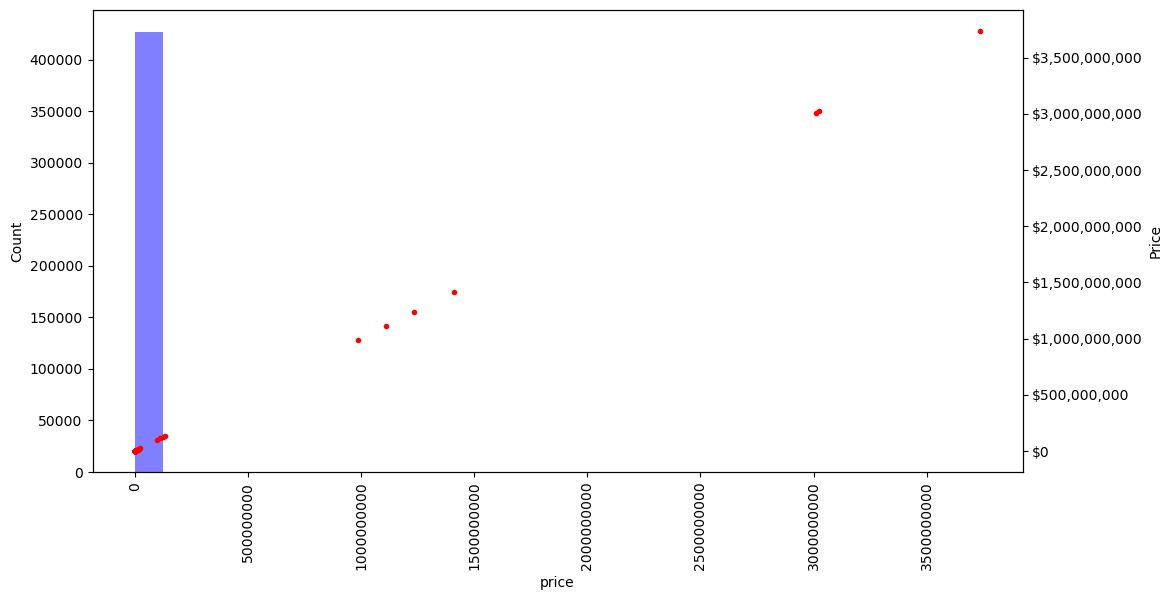


-----------------------------------------------------------------------------

Column Name: VIN (Categorical - top 5 most common)
1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
Name: VIN, dtype: int64
Number of Unique Values: 118264

-----------------------------------------------------------------------------

Column Name: condition (Categorical)
Number of Unique Values: 6


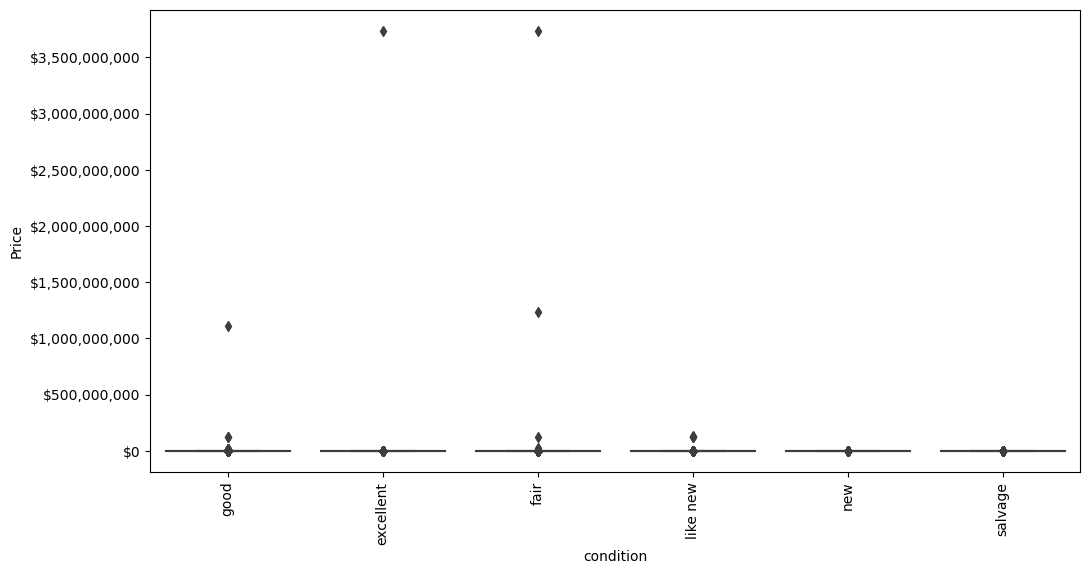


-----------------------------------------------------------------------------

Column Name: cylinders (Categorical)
Number of Unique Values: 8


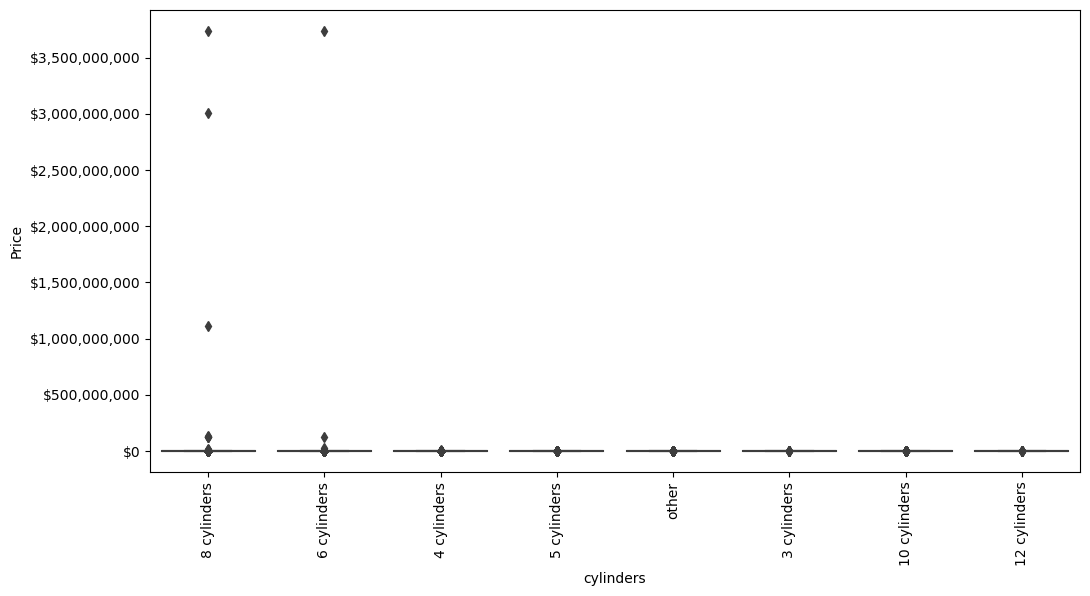


-----------------------------------------------------------------------------

Column Name: description (Categorical - top 5 most common)
35 VEHICLES PRICED UNDER $3000!!!  BIG TIME! TAX TIME! SALE TIME!  CALL US NOW!!! 321-242-0328  30TH YEAR IN BUSINESS!!!!  OUR ADDRESS:  1900 AURORA RD. MELBOURNE, FL 32935  321-242-0328  Call us or visit us now we have a huge selection of honda accord and civic and pilot in stock at all times! we specialize in Toyota Camry and Corolla and Sienna and 3RD Row Suv. We also stock Domestics like Ford Fusion Explorer and Escape and the really nice Edge. if you care looking for Chevy Traverse or Chevrolet Malibu or Impala and Cruze for gas saving we have those as well, including Buick Enclave we always have em! Lacrosse and Regal are here too! Encore is available just call first. We stock Luxury Brands like Acura Lexus and German brands BMW Mercedes Benz and Audi. Dont get us started on Jeep! We love to sell Grand Cherokee and Patriot and Compass! Want a 

Number of Unique Values: 360911

-----------------------------------------------------------------------------

Column Name: drive (Categorical)
Number of Unique Values: 3


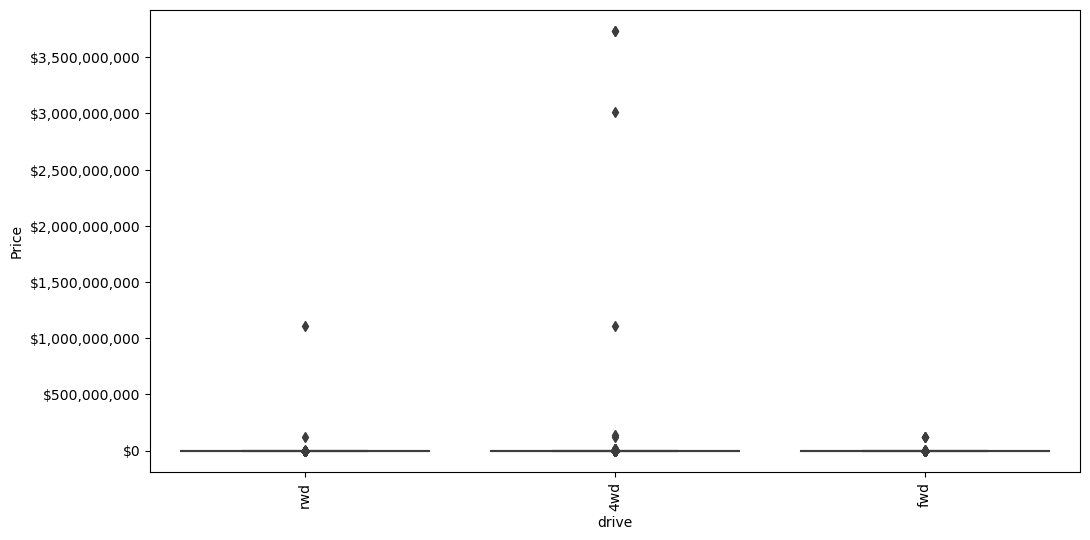


-----------------------------------------------------------------------------

Column Name: fuel (Categorical)
Number of Unique Values: 5


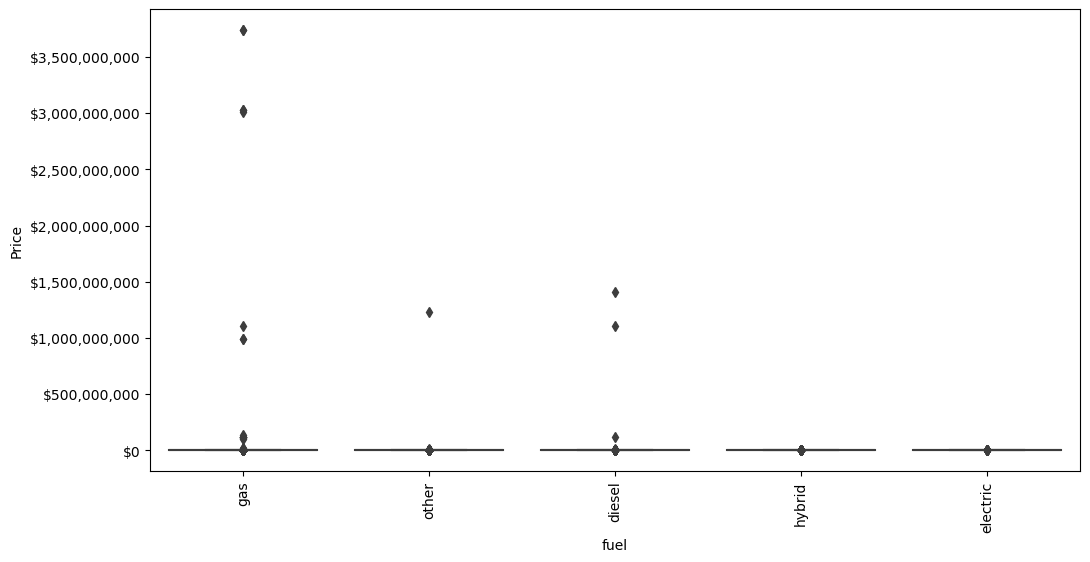


-----------------------------------------------------------------------------

Column Name: id (Numeric)
Median: 7312620821.0
Q1: 7308143339.25
Q3: 7315253543.5
Min: 7207408119
Max: 7317101084


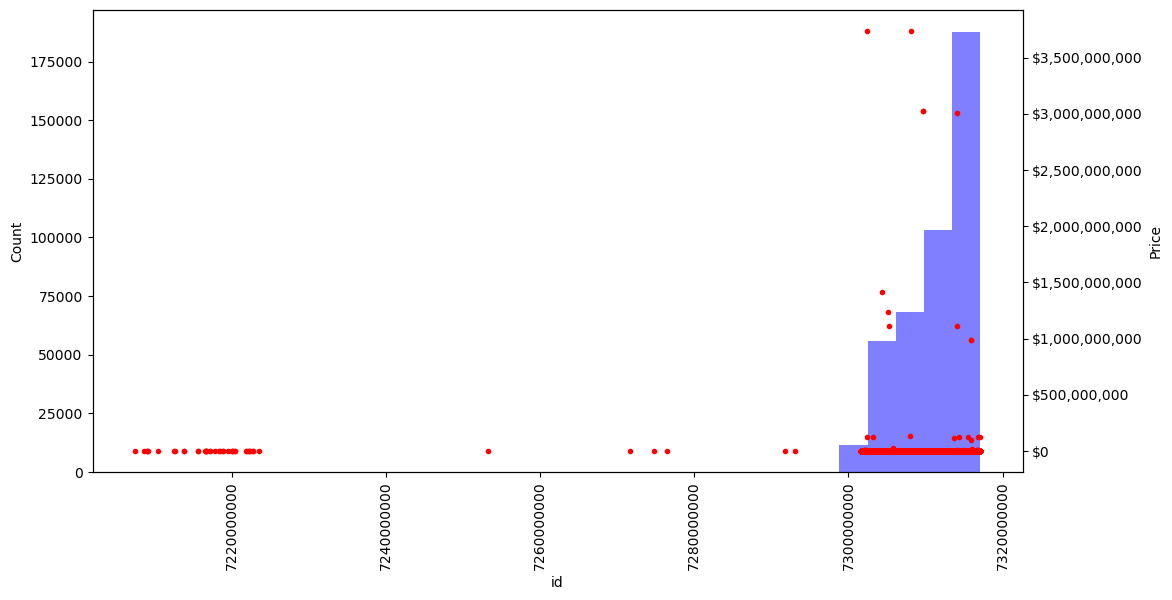


-----------------------------------------------------------------------------

Column Name: image_url (Categorical - top 5 most common)
https://images.craigslist.org/00N0N_1xMPvfxRAIdz_0gw0co_600x450.jpg    7357
https://images.craigslist.org/00R0R_lwWjXSEWNa7z_0x20oM_600x450.jpg    2192
https://images.craigslist.org/01111_l590CdXzJSoz_001001_600x450.jpg     276
https://images.craigslist.org/01313_9Zne268YnWZz_0gw0co_600x450.jpg     231
https://images.craigslist.org/00X0X_1cMDo5xqSuAz_0gw0co_600x450.jpg     227
Name: image_url, dtype: int64
Number of Unique Values: 241899

-----------------------------------------------------------------------------

Column Name: lat (Numeric)
Median: 39.1501
Q1: 34.6019
Q3: 42.3989
Min: -84.122245
Max: 82.390818


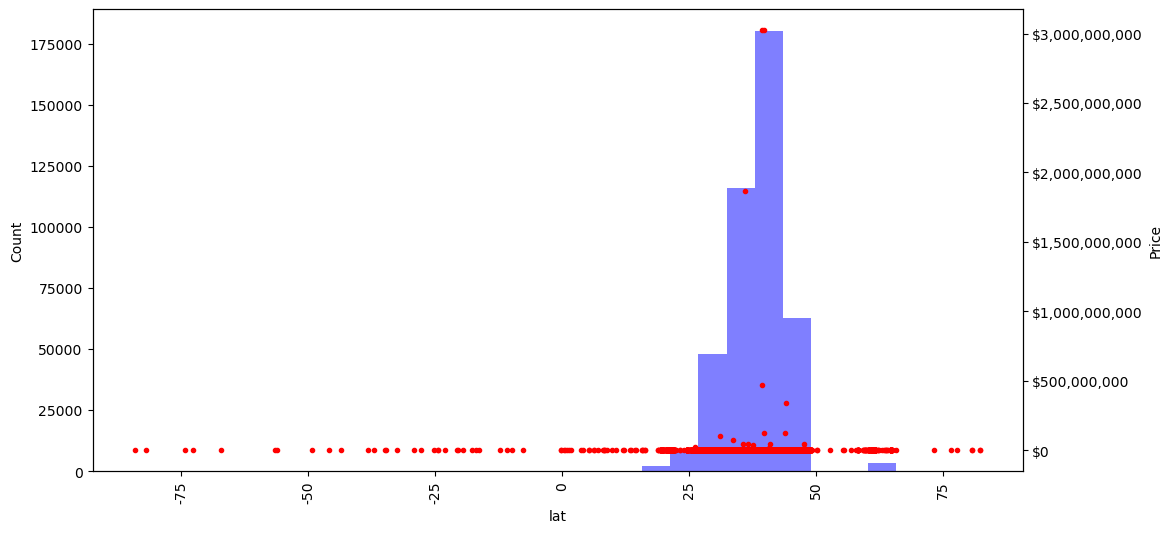


-----------------------------------------------------------------------------

Column Name: long (Numeric)
Median: -88.4326
Q1: -111.939847
Q3: -80.832039
Min: -159.827728
Max: 173.885502


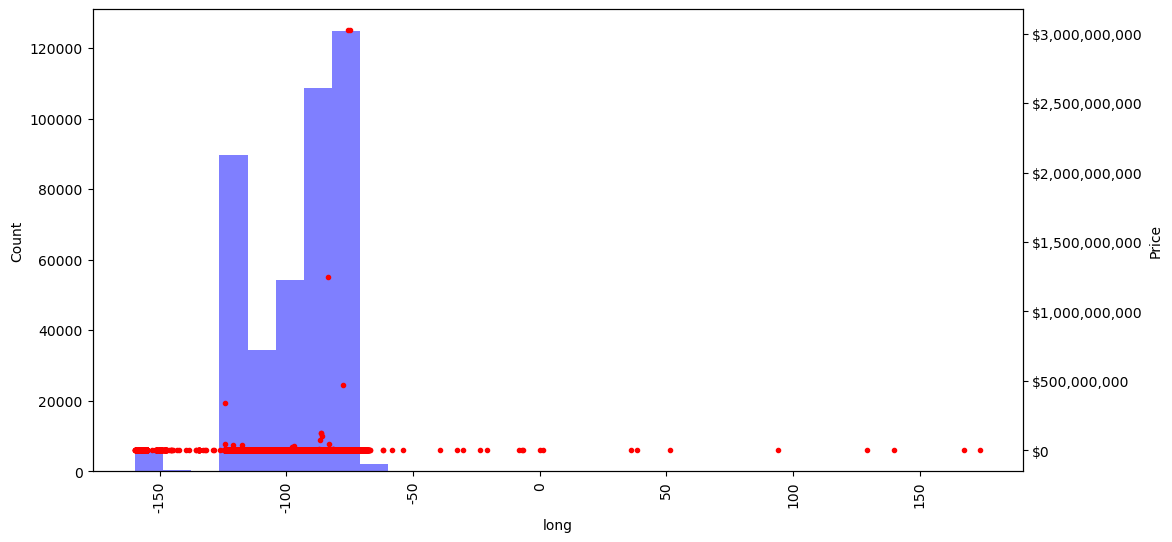


-----------------------------------------------------------------------------

Column Name: manufacturer (Categorical)
Number of Unique Values: 42


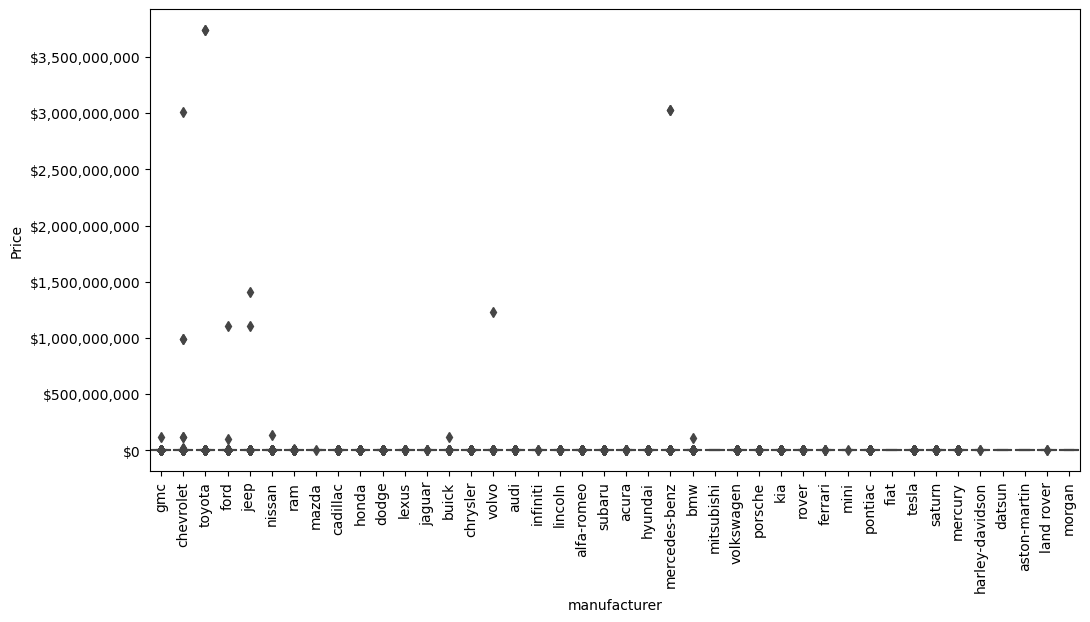


-----------------------------------------------------------------------------

Column Name: model (Categorical - top 5 most common)
f-150             8009
silverado 1500    5140
1500              4211
camry             3135
silverado         3023
Name: model, dtype: int64
Number of Unique Values: 29667

-----------------------------------------------------------------------------

Column Name: odometer (Numeric)
Median: 85548.0
Q1: 37704.0
Q3: 133542.5
Min: 0.0
Max: 10000000.0


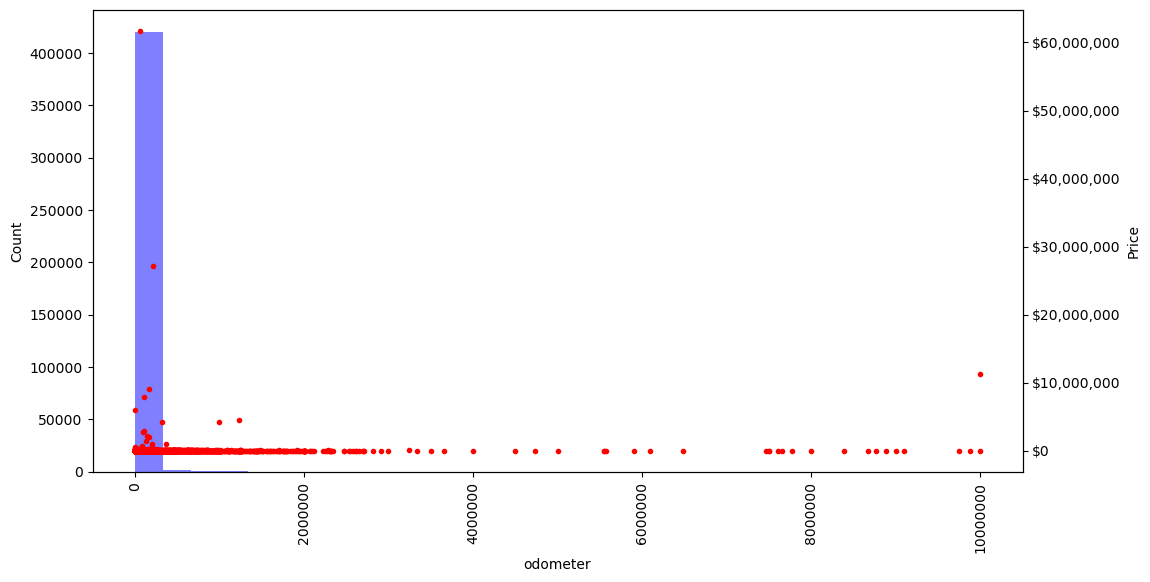


-----------------------------------------------------------------------------

Column Name: paint_color (Categorical)
Number of Unique Values: 12


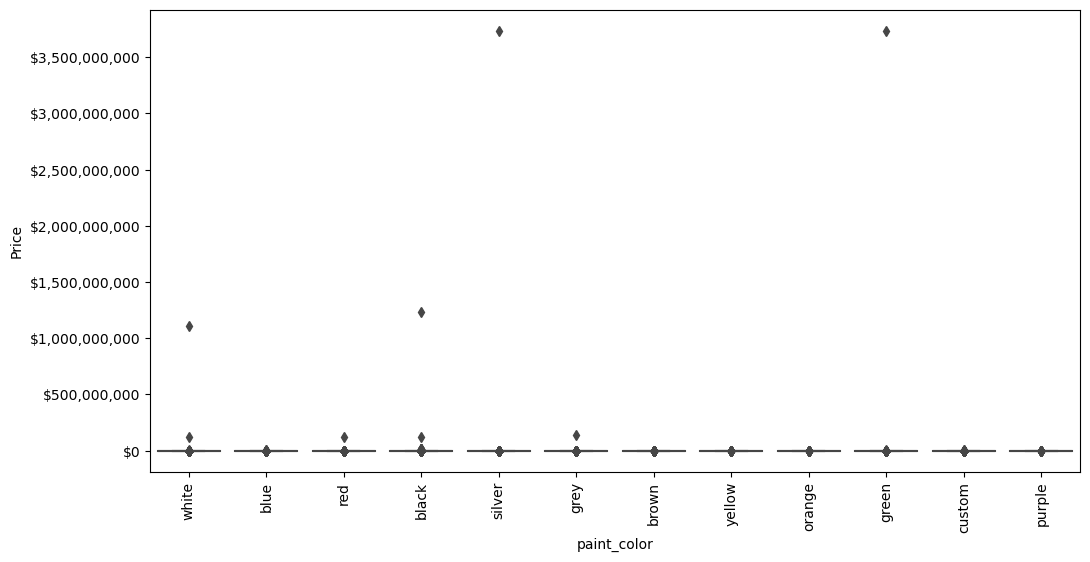


-----------------------------------------------------------------------------

Column Name: posting_date (Categorical - top 5 most common)
2021-04-23T22:13:05-0400    12
2021-04-13T13:19:15-0500    11
2021-04-22T20:32:05-0400    11
2021-04-16T12:07:56-0500    10
2021-04-29T20:06:09-0500     9
Name: posting_date, dtype: int64
Number of Unique Values: 381536

-----------------------------------------------------------------------------

Column Name: region (Categorical - top 5 most common)
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
Name: region, dtype: int64
Number of Unique Values: 404

-----------------------------------------------------------------------------

Column Name: region_url (Categorical - top 5 most common)
https://spokane.craigslist.org    2988
https://eugene.craigslist.org     2985
https://fresno.craigslist.org     2983
https://orlando.craigslist.org    2

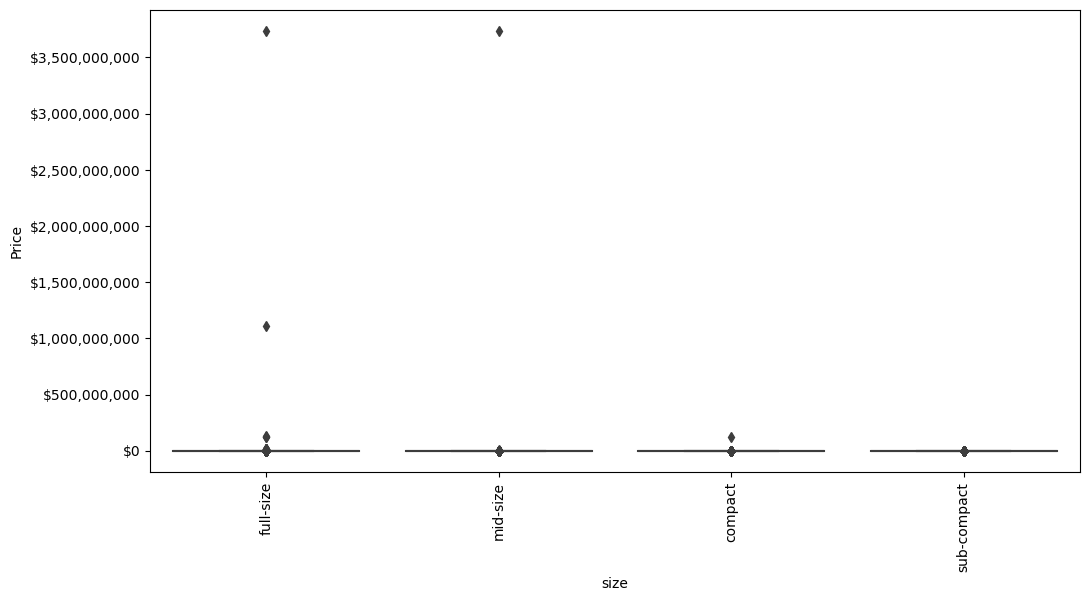


-----------------------------------------------------------------------------

Column Name: state (Categorical)
Number of Unique Values: 51


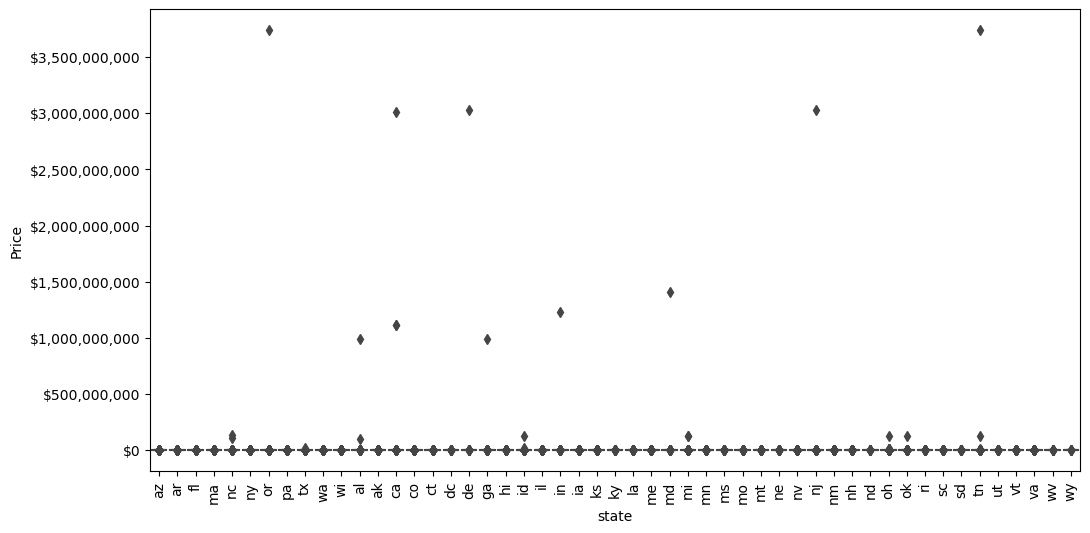


-----------------------------------------------------------------------------

Column Name: title_status (Categorical)
Number of Unique Values: 6


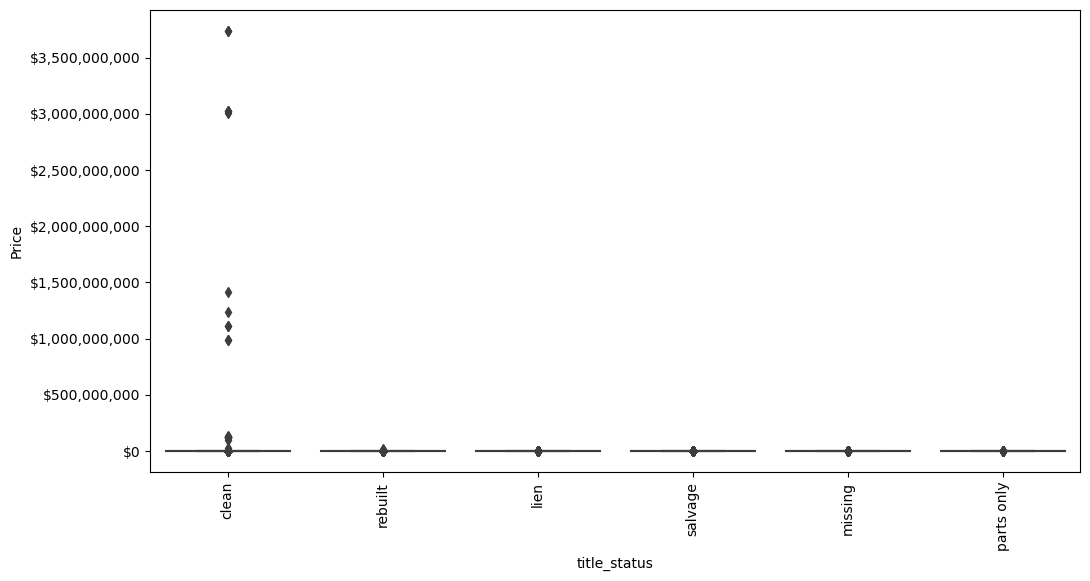


-----------------------------------------------------------------------------

Column Name: transmission (Categorical)
Number of Unique Values: 3


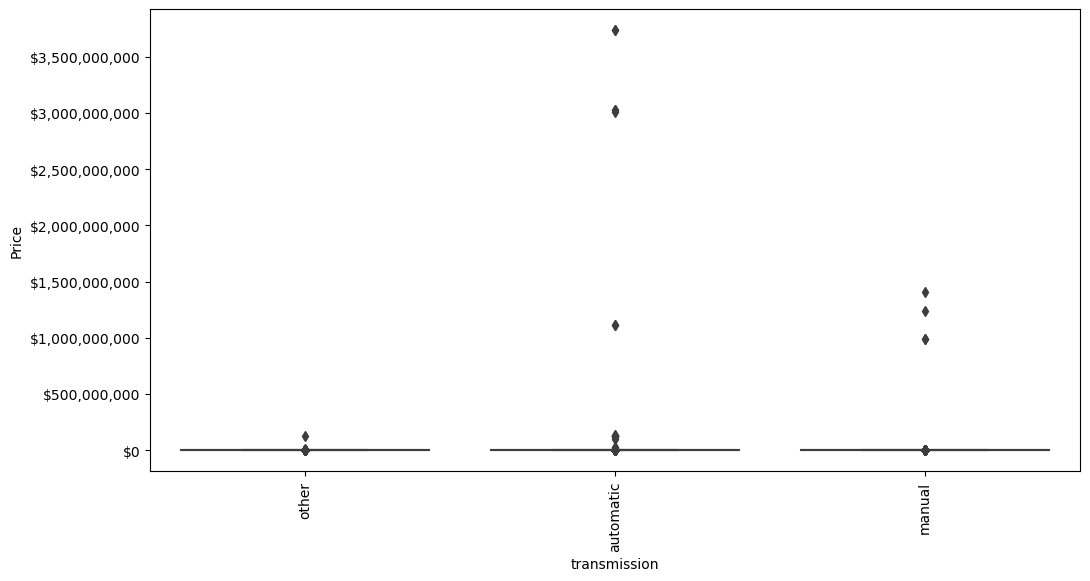


-----------------------------------------------------------------------------

Column Name: type (Categorical)
Number of Unique Values: 13


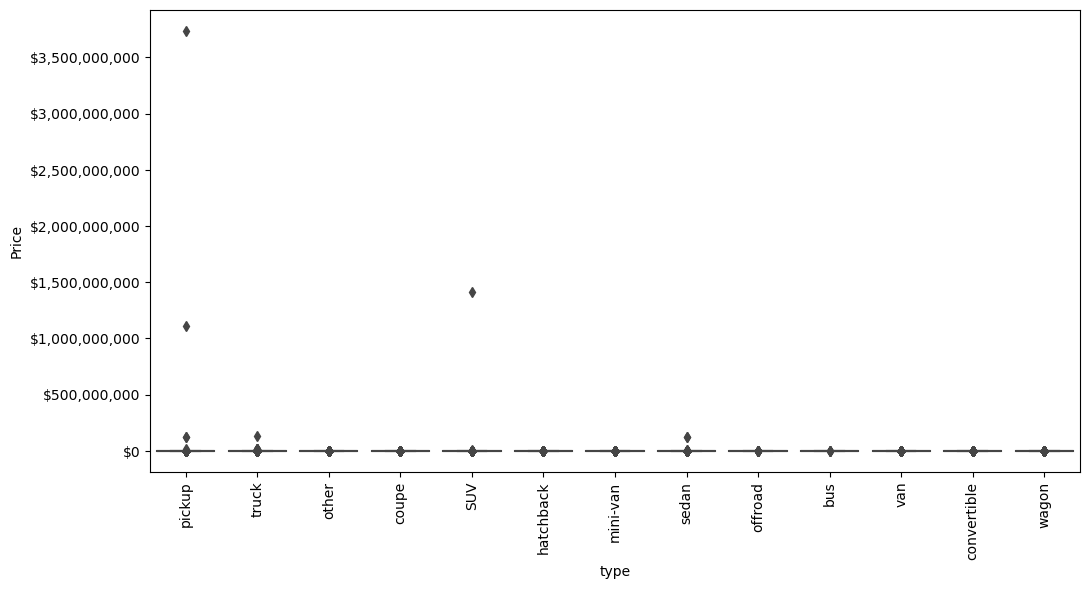


-----------------------------------------------------------------------------

Column Name: url (Categorical - top 5 most common)
https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html            1
https://nh.craigslist.org/cto/d/troy-1998-dodge-ram-59-cummins/7313139418.html             1
https://nh.craigslist.org/ctd/d/north-hampton-2012-hyundai-sante-fe-se/7313423023.html     1
https://nh.craigslist.org/ctd/d/derry-2008-chrysler-sebring-limited-all/7313423324.html    1
https://nh.craigslist.org/ctd/d/derry-2002-toyota-camry-low-miles/7313424533.html          1
Name: url, dtype: int64
Number of Unique Values: 426880

-----------------------------------------------------------------------------

Column Name: year (Numeric)
Median: 2013.0
Q1: 2008.0
Q3: 2017.0
Min: 1900.0
Max: 2022.0


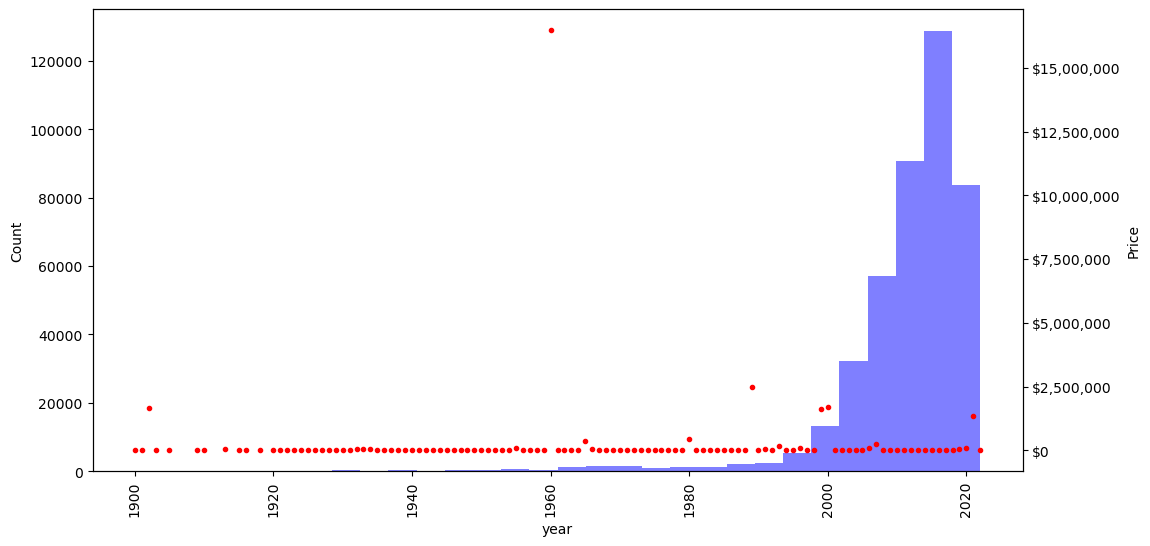

In [36]:
eda_plots(df)

##### Obviously some prices are skewing this. Let's print out the rows with the top 20 highest prices

In [37]:
# Sort the DataFrame by 'price' in descending order and select the top 20 rows
top_10 = df.sort_values(by='price', ascending=False).head(10)

# Convert the DataFrame to an HTML table
html_table = top_10.to_html()

# Display the HTML table in a Jupyter Notebook cell
display(HTML(html_table))


,price,VIN,condition,cylinders,description,drive,fuel,id,image_url,lat,long,manufacturer,model,odometer,paint_color,posting_date,region,region_url,size,state,title_status,transmission,type,url,year
318592,3736928711,NaN,excellent,8 cylinders,Selling my 2007 Toyota Tundra SR5 four wheel drive Amazing condition everything works as it should newer wheels and tires about 60% no leaks what so ever runs and drives great killer trim package contact for any further information no scams or emails will be answered or ridiculous low ball offers text or call please CASH ONLY show contact info thanks for your interest!,4wd,gas,7308056031,https://images.craigslist.org/00v0v_3K0RsmdR5cuz_0CI0t2_600x450.jpg,44.066092,-124.037561,toyota,tundra,164000.0,silver,2021-04-16T18:16:12-0700,eugene,https://eugene.craigslist.org,full-size,or,clean,automatic,pickup,https://eugene.craigslist.org/cto/d/florence-2007-toyota-tundra-trd-sr5/7308056031.html,2007.0
356716,3736928711,NaN,fair,6 cylinders,"99 four runner 211,000 miles runs great 4x4 works great heat and air works setting on Ironman 35s good tread ,sun roof not working and has cracked windshield, body not perfect but it’s a good running vehicle it’s a Toyota and they last—— looking to trade for a full size suv I need something better suited for pulling a trailer I also have kids so I need a back seat also whatever I trade on needs to have heat and air and would like it to be 4x4 like mine I might look at some trucks but would prefer suv so I can haul my kids with no problems call or text at 42three-592-094six",4wd,gas,7302445002,https://images.craigslist.org/00Y0Y_f6XKAW6imiRz_0t20CI_600x450.jpg,36.081000,-83.567300,toyota,4runner,211000.0,green,2021-04-05T23:15:48-0400,knoxville,https://knoxville.craigslist.org,mid-size,tn,clean,automatic,NaN,https://knoxville.craigslist.org/cto/d/new-market-1999-toyota-runner/7302445002.html,1999.0
257840,3024942282,NaN,NaN,NaN,"Text Jason 3024942282 All Mercedes wanted any year ,any condition 24/7 fast free pick up paying cash for your Mercedes S430 s500 slk230 e320 e430 c320 c280 ml500 ml320 any model any year running or noto",NaN,gas,7309735768,https://images.craigslist.org/00e0e_2rjEdt2IhzEz_06s03f_600x450.jpg,39.339954,-74.719676,mercedes-benz,benz s430,100000.0,NaN,2021-04-20T08:59:55-0400,south jersey,https://southjersey.craigslist.org,NaN,nj,clean,automatic,NaN,https://southjersey.craigslist.org/ctd/d/tuckahoe-cash-mercedes-any-year-cond/7309735768.html,2000.0
91576,3024942282,NaN,NaN,NaN,"Any year,any condition ! Text Jason 3024942282 24/7 E320 slk230 s430 s500 s55 s600 c320 c230 c280 e400 s420 sl500 ml320 ml500 clk320 clk430",NaN,gas,7309730903,https://images.craigslist.org/00e0e_2rjEdt2IhzEz_06s03f_600x450.jpg,39.703511,-75.746681,mercedes-benz,benz e320,100000.0,NaN,2021-04-20T08:46:47-0400,delaware,https://delaware.craigslist.org,NaN,de,clean,automatic,NaN,https://delaware.craigslist.org/ctd/d/newark-a-h-m-r-e-e-any-year-cond/7309730903.html,2000.0
37410,3009548743,NaN,NaN,8 cylinders,WE WILL BUY YOUR TRUCK & JEEP & HARLEY DAVIDSON PAY TOP DOLLAR FOR YOUR LIFTED LOWERED TRUCK CHEVROLET SILVERADO 1500 2500 3500 GMC SIERRA 1500 2500 3500 FORD F150 F250 F350 4X4 DIESEL V8 DYNA ROAD KING STREET GLIDE FAT BOY JEEP WRANGLER SAHARA LIFTED LOWERED KARS R US 2282 TENAYA DR MODESTO CA. 95354 (209) 544-1388,4wd,gas,7314052904,https://images.craigslist.org/00707_lRqP2sVcBxxz_0wI0iL_600x450.jpg,37.640900,-120.974900,chevrolet,NaN,1000.0,NaN,2021-04-28T14:28:42-0700,modesto,https://modesto.craigslist.org,NaN,ca,clean,automatic,NaN,https://modesto.craigslist.org/ctd/d/modesto-we-buy-trucks-lifted-diesel/7314052904.html,2021.0
184704,1410065407,NaN,NaN,NaN,"TRADES ONLY TRUCK OR WHAT DO YOU GOT? This is a trail rig a off road beast , if you wanted to daily it you could all lights and such work has a 7 inch lift comes with 31 inch and 35 inch tires and rims. 4.0 STRAIGHT 6. Manual trans shifts smooth no grinding at all. It is a beast if your looking for a weekend to

##### For illustrative purposes, delete all observations that are $100K

In [38]:
# Count the number of observations with a 'price' over 200,000
n_over_200k = (df['price'] > 100000).sum()

# Calculate the percent of observations with a 'price' over 200,000
pct_over_200k = n_over_200k / len(df) * 100

# Remove the observations with a 'price' over 200,000
df = df[df['price'] <= 100000]

# Display the results
print(f"Number of observations with a 'price' over 200,000: {n_over_200k}")
print(f"Percent of observations with a 'price' over 200,000: {pct_over_200k:.2f}%")
print("Observations with a 'price' over 200,000 removed.")


Number of observations with a 'price' over 200,000: 655
Percent of observations with a 'price' over 200,000: 0.15%
Observations with a 'price' over 200,000 removed.


##### Re-run EDA


-----------------------------------------------------------------------------

Column Name: price (Numeric)
Median: 13900.0
Q1: 5900.0
Q3: 26000.0
Min: 0
Max: 100000


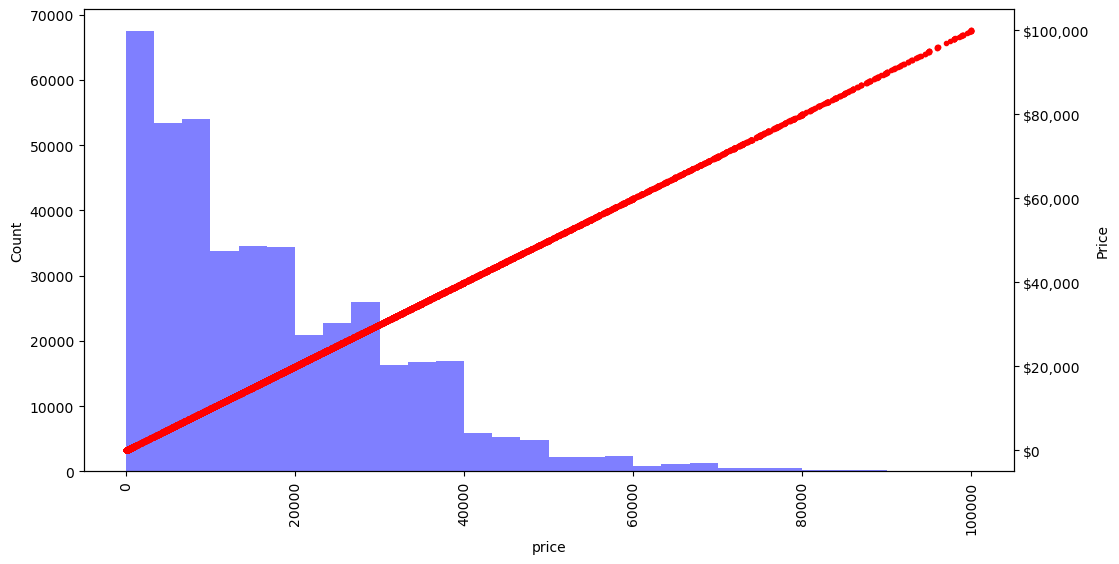


-----------------------------------------------------------------------------

Column Name: VIN (Categorical - top 5 most common)
1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
Name: VIN, dtype: int64
Number of Unique Values: 118099

-----------------------------------------------------------------------------

Column Name: condition (Categorical)
Number of Unique Values: 6


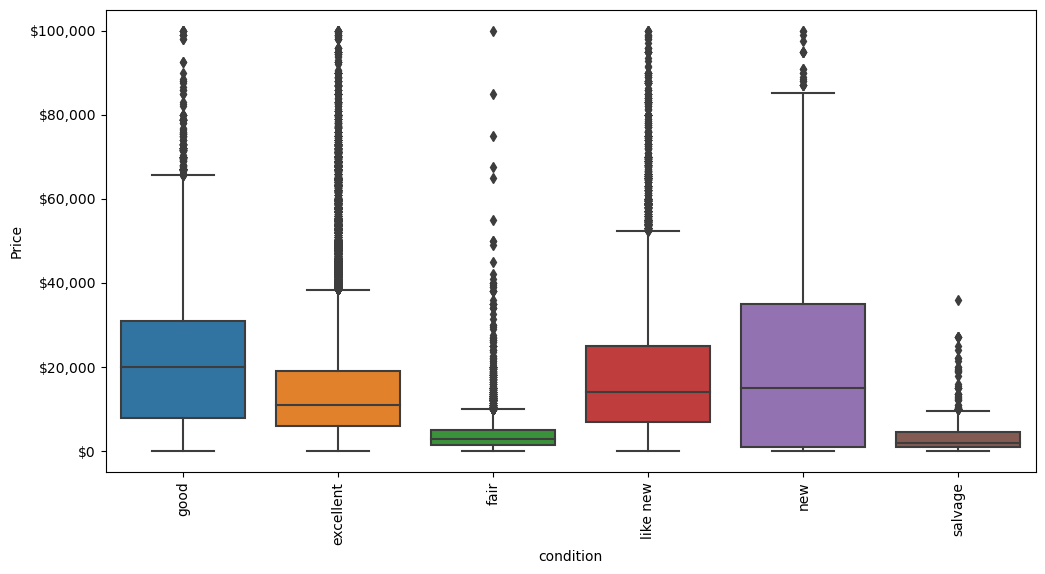


-----------------------------------------------------------------------------

Column Name: cylinders (Categorical)
Number of Unique Values: 8


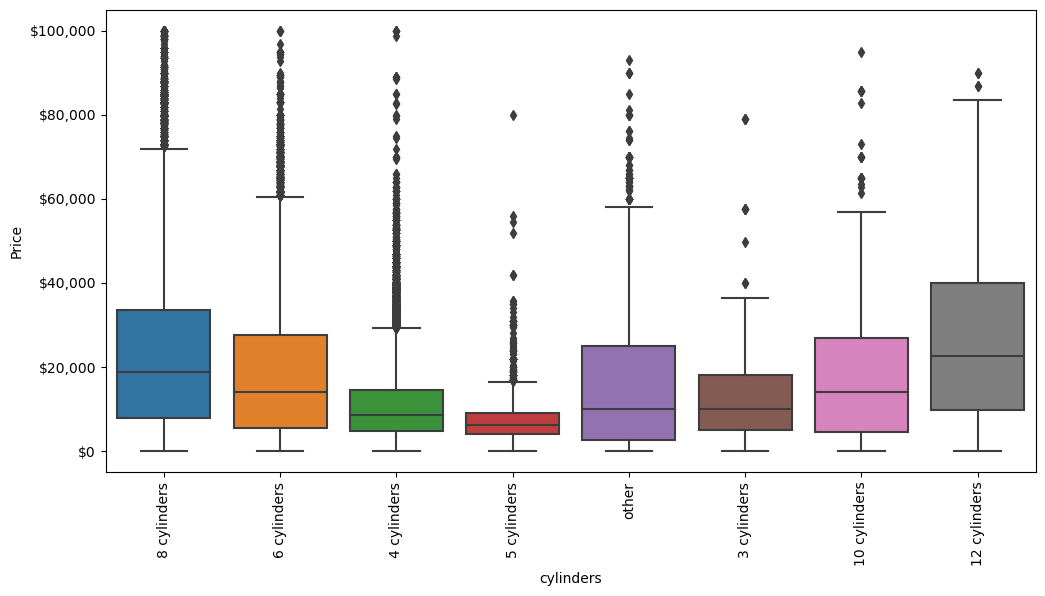


-----------------------------------------------------------------------------

Column Name: description (Categorical - top 5 most common)
35 VEHICLES PRICED UNDER $3000!!!  BIG TIME! TAX TIME! SALE TIME!  CALL US NOW!!! 321-242-0328  30TH YEAR IN BUSINESS!!!!  OUR ADDRESS:  1900 AURORA RD. MELBOURNE, FL 32935  321-242-0328  Call us or visit us now we have a huge selection of honda accord and civic and pilot in stock at all times! we specialize in Toyota Camry and Corolla and Sienna and 3RD Row Suv. We also stock Domestics like Ford Fusion Explorer and Escape and the really nice Edge. if you care looking for Chevy Traverse or Chevrolet Malibu or Impala and Cruze for gas saving we have those as well, including Buick Enclave we always have em! Lacrosse and Regal are here too! Encore is available just call first. We stock Luxury Brands like Acura Lexus and German brands BMW Mercedes Benz and Audi. Dont get us started on Jeep! We love to sell Grand Cherokee and Patriot and Compass! Want a 

Number of Unique Values: 360402

-----------------------------------------------------------------------------

Column Name: drive (Categorical)
Number of Unique Values: 3


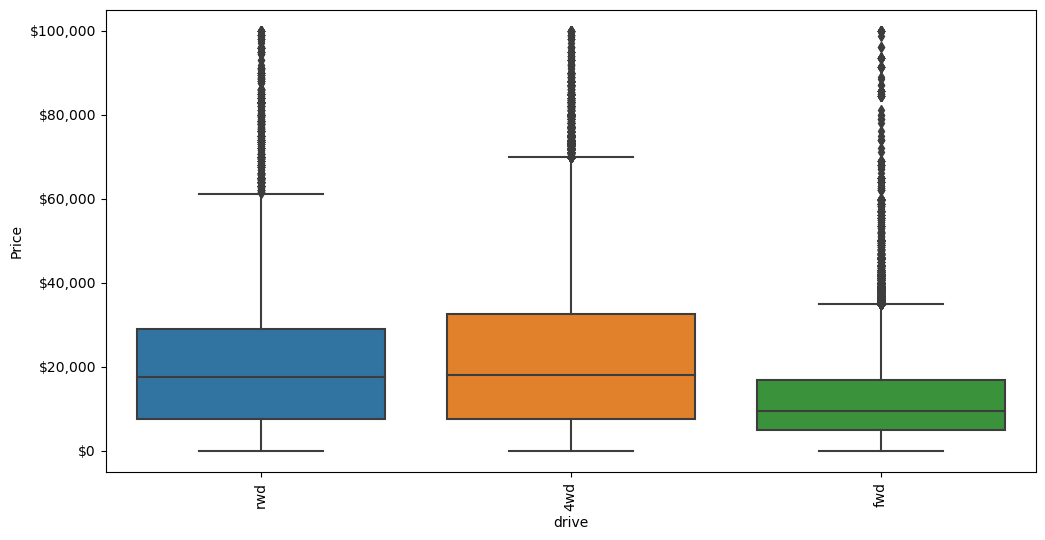


-----------------------------------------------------------------------------

Column Name: fuel (Categorical)
Number of Unique Values: 5


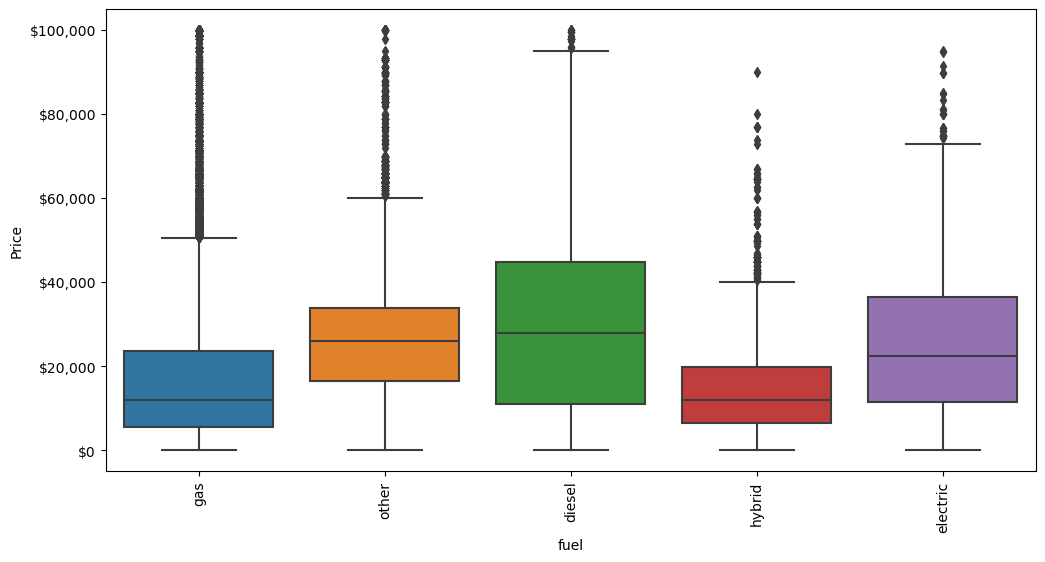


-----------------------------------------------------------------------------

Column Name: id (Numeric)
Median: 7312618139.0
Q1: 7308141968.0
Q3: 7315253360.0
Min: 7207408119
Max: 7317101084


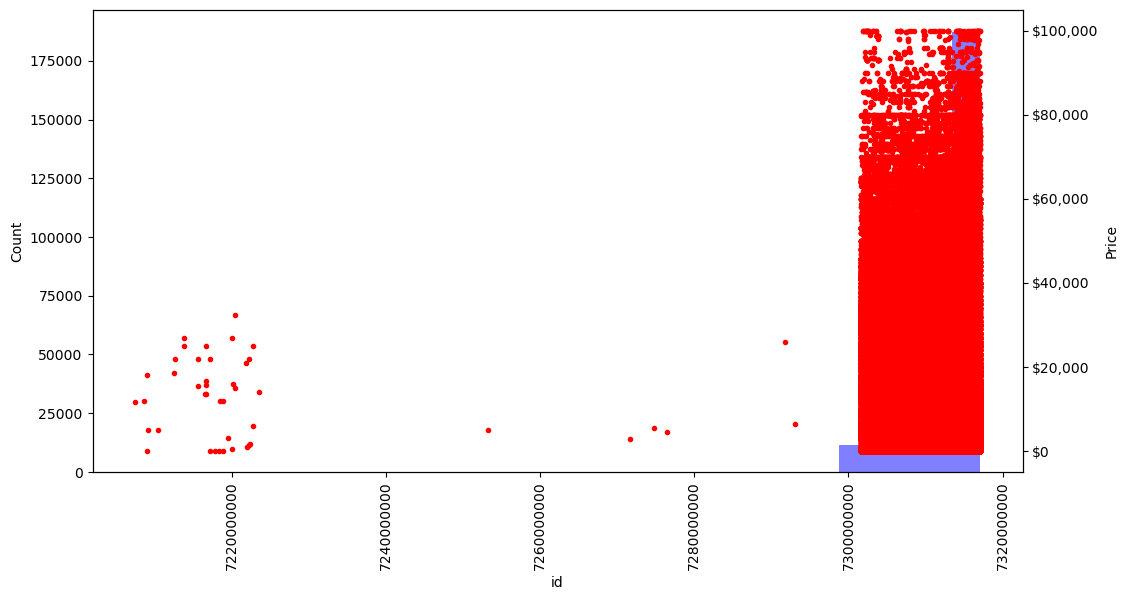


-----------------------------------------------------------------------------

Column Name: image_url (Categorical - top 5 most common)
https://images.craigslist.org/00N0N_1xMPvfxRAIdz_0gw0co_600x450.jpg    7357
https://images.craigslist.org/00R0R_lwWjXSEWNa7z_0x20oM_600x450.jpg    2192
https://images.craigslist.org/01111_l590CdXzJSoz_001001_600x450.jpg     275
https://images.craigslist.org/01313_9Zne268YnWZz_0gw0co_600x450.jpg     231
https://images.craigslist.org/00X0X_1cMDo5xqSuAz_0gw0co_600x450.jpg     227
Name: image_url, dtype: int64
Number of Unique Values: 241516

-----------------------------------------------------------------------------

Column Name: lat (Numeric)
Median: 39.1507
Q1: 34.6019
Q3: 42.3989
Min: -84.122245
Max: 82.390818


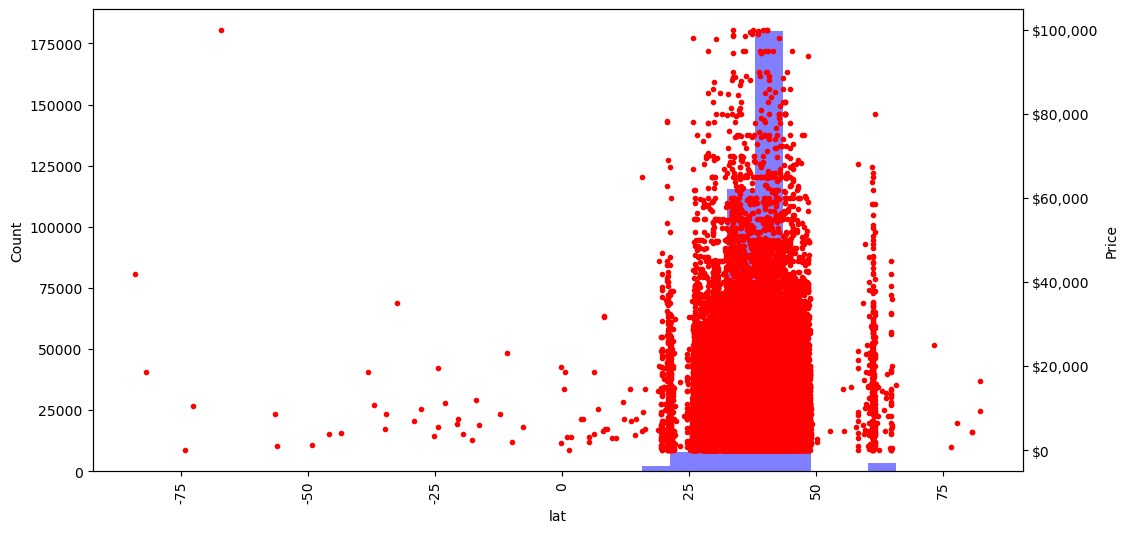


-----------------------------------------------------------------------------

Column Name: long (Numeric)
Median: -88.4175
Q1: -111.9397
Q3: -80.832039
Min: -159.827728
Max: 173.885502


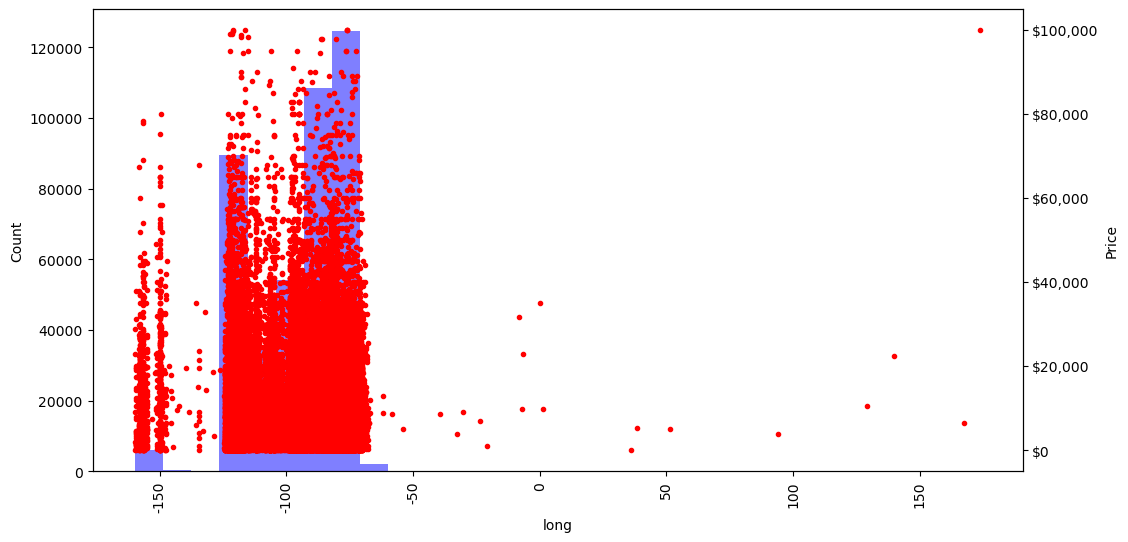


-----------------------------------------------------------------------------

Column Name: manufacturer (Categorical)
Number of Unique Values: 42


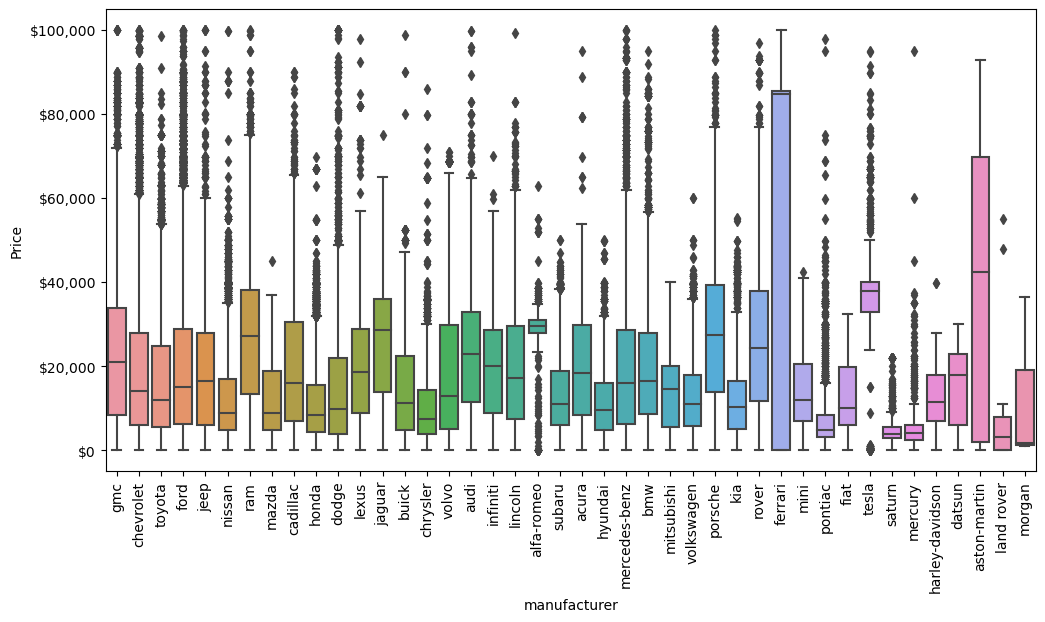


-----------------------------------------------------------------------------

Column Name: model (Categorical - top 5 most common)
f-150             8009
silverado 1500    5140
1500              4208
camry             3135
silverado         3022
Name: model, dtype: int64
Number of Unique Values: 29529

-----------------------------------------------------------------------------

Column Name: odometer (Numeric)
Median: 85654.0
Q1: 37812.0
Q3: 133654.0
Min: 0.0
Max: 10000000.0


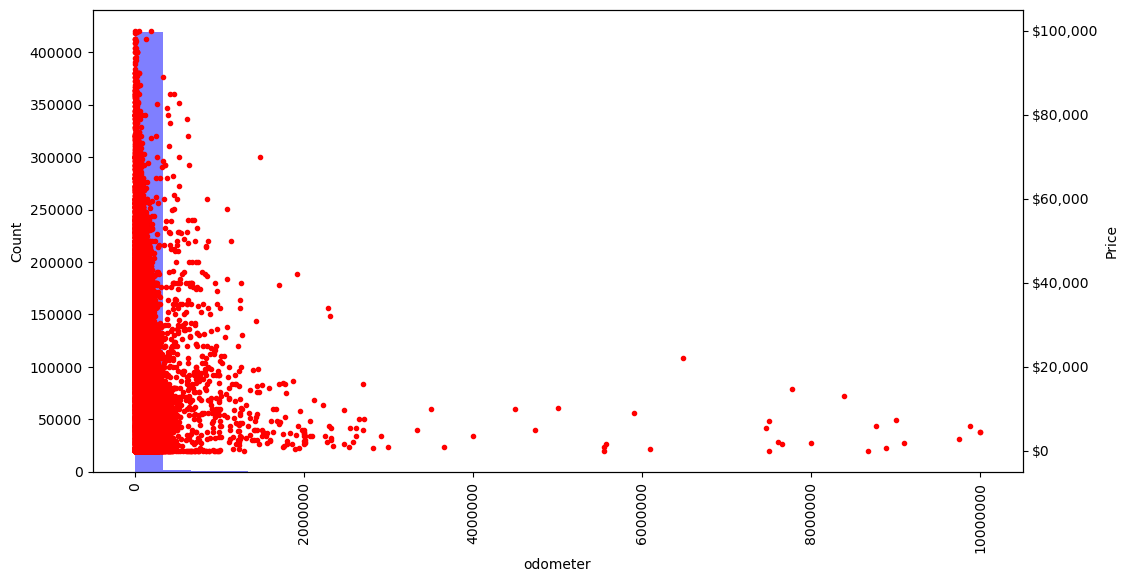


-----------------------------------------------------------------------------

Column Name: paint_color (Categorical)
Number of Unique Values: 12


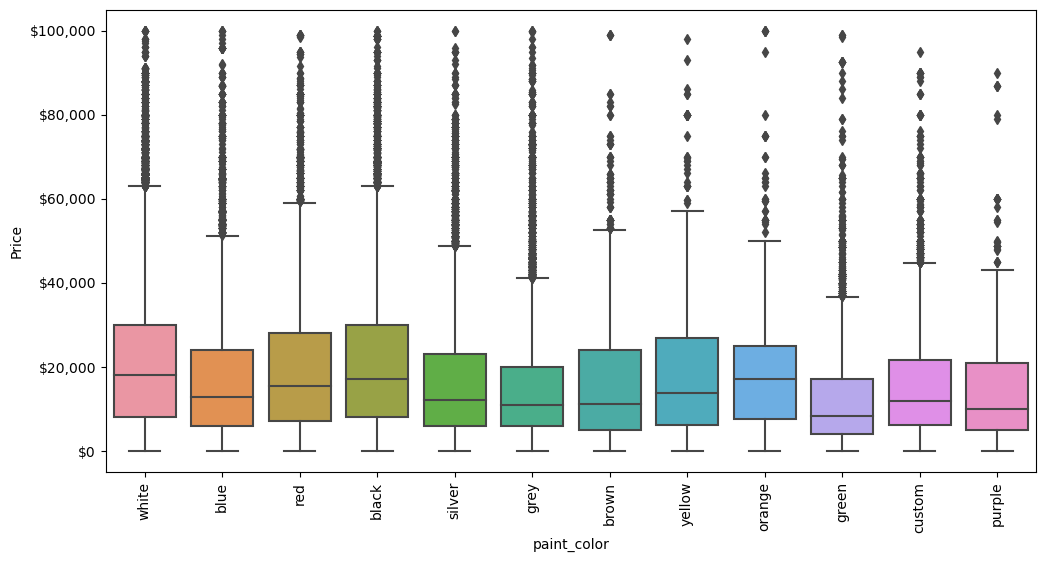


-----------------------------------------------------------------------------

Column Name: posting_date (Categorical - top 5 most common)
2021-04-23T22:13:05-0400    12
2021-04-13T13:19:15-0500    11
2021-04-22T20:32:05-0400    11
2021-04-16T12:07:56-0500    10
2021-04-30T10:01:13-0400     9
Name: posting_date, dtype: int64
Number of Unique Values: 380963

-----------------------------------------------------------------------------

Column Name: region (Categorical - top 5 most common)
columbus                    3606
jacksonville                3556
spokane / coeur d'alene     2982
kennewick-pasco-richland    2981
fresno / madera             2980
Name: region, dtype: int64
Number of Unique Values: 404

-----------------------------------------------------------------------------

Column Name: region_url (Categorical - top 5 most common)
https://spokane.craigslist.org     2982
https://kpr.craigslist.org         2981
https://fresno.craigslist.org      2980
https://omaha.craigslist.or

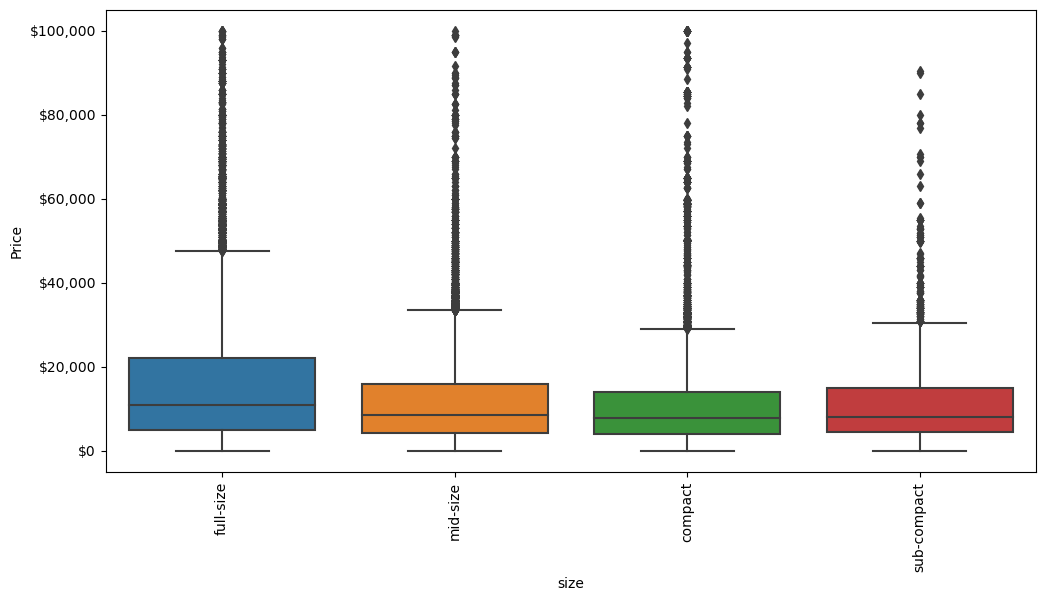


-----------------------------------------------------------------------------

Column Name: state (Categorical)
Number of Unique Values: 51


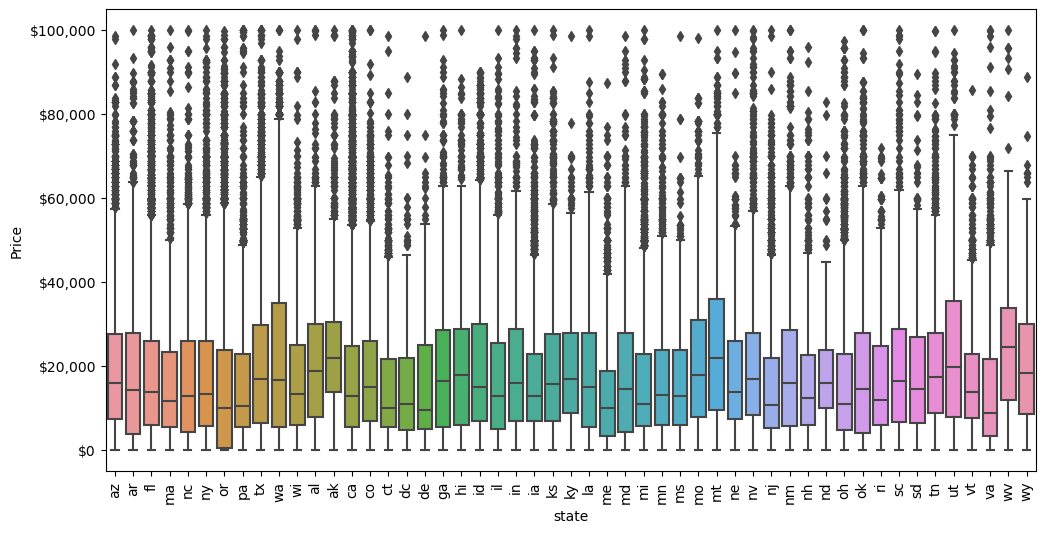


-----------------------------------------------------------------------------

Column Name: title_status (Categorical)
Number of Unique Values: 6


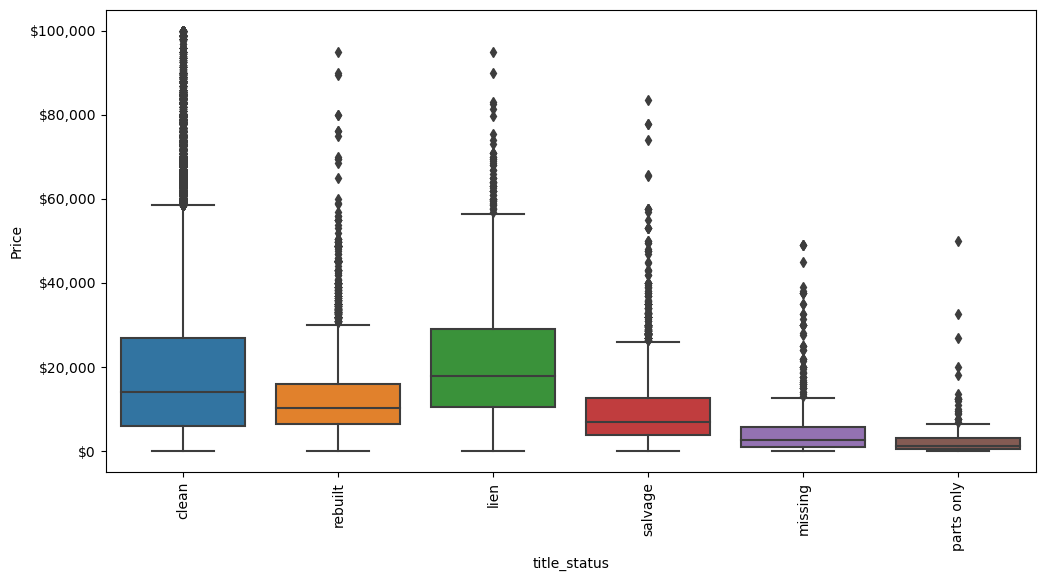


-----------------------------------------------------------------------------

Column Name: transmission (Categorical)
Number of Unique Values: 3


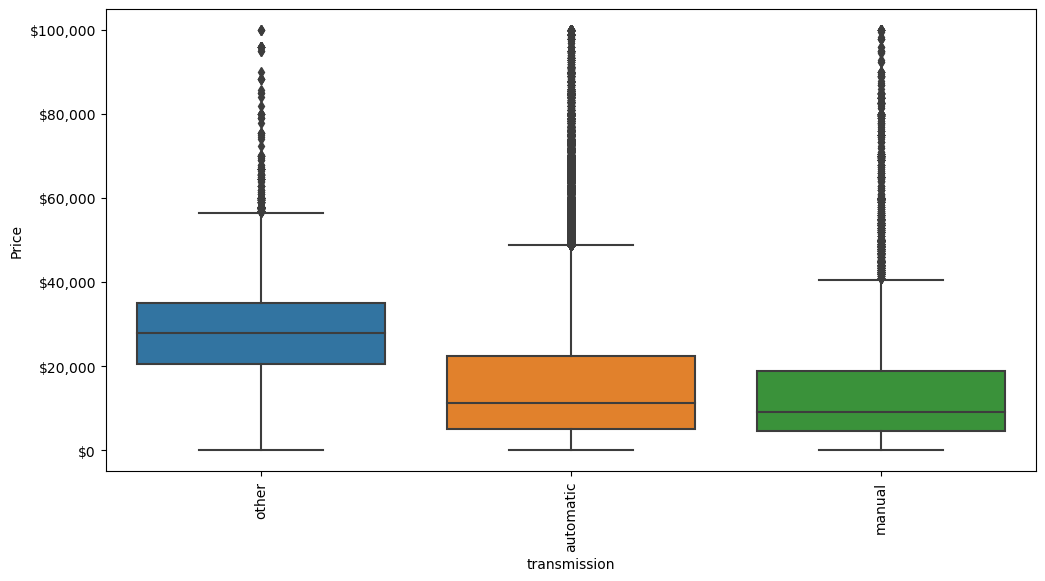


-----------------------------------------------------------------------------

Column Name: type (Categorical)
Number of Unique Values: 13


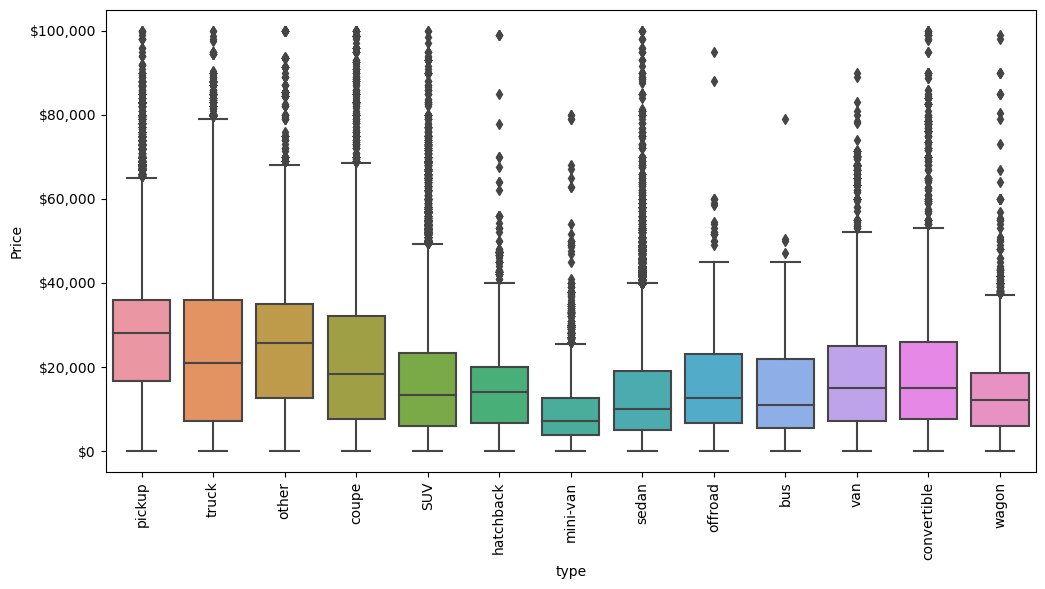


-----------------------------------------------------------------------------

Column Name: url (Categorical - top 5 most common)
https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html            1
https://nh.craigslist.org/ctd/d/manchester-2017-dodge-challenger-t/7311967313.html         1
https://nh.craigslist.org/ctd/d/methuen-2018-kia-optima-lx-4dr-sedan/7313409376.html       1
https://nh.craigslist.org/ctd/d/chichester-2015-toyota-venza-le-bad/7313414839.html        1
https://nh.craigslist.org/ctd/d/londonderry-2018-gmc-terrain-denali-4x4/7313418959.html    1
Name: url, dtype: int64
Number of Unique Values: 426225

-----------------------------------------------------------------------------

Column Name: year (Numeric)
Median: 2013.0
Q1: 2008.0
Q3: 2017.0
Min: 1900.0
Max: 2022.0


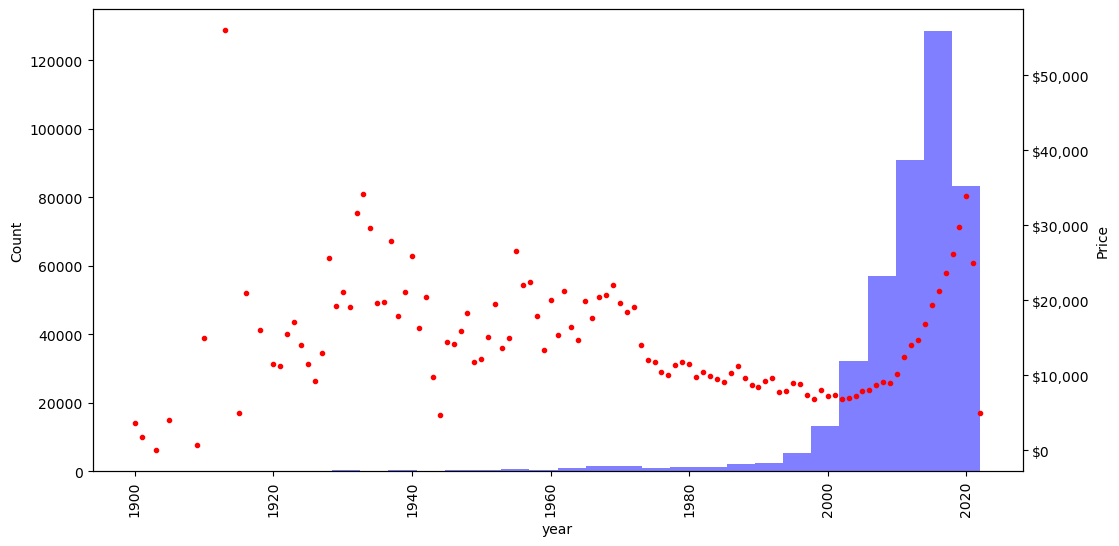

In [39]:
eda_plots(df)

In [48]:
df['model'].value_counts()

f-150                      8009
silverado 1500             5140
1500                       4208
camry                      3135
silverado                  3022
                           ... 
f 150 4x4                     1
Escalade Premium              1
04 mb ml350                   1
explorer sport track          1
Paige Glenbrook Touring       1
Name: model, Length: 29529, dtype: int64

In [49]:
df['model'].head(50)

0                             NaN
1                             NaN
2                             NaN
3                             NaN
4                             NaN
5                             NaN
6                             NaN
7                             NaN
8                             NaN
9                             NaN
10                            NaN
11                            NaN
12                            NaN
13                            NaN
14                            NaN
15                            NaN
16                            NaN
17                            NaN
18                            NaN
19                            NaN
20                            NaN
21                            NaN
22                            NaN
23                            NaN
24                            NaN
25                            NaN
26                            NaN
27       sierra 1500 crew cab slt
28                 silverado 1500
29            

##### Based on the EDA above, I believe VIN, description, id, and image_url, region_url, and url can be removed. As previously discussed, county was also removed bc all values were null. Size also has 71% missing so we can remove that too